In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from scipy.stats import skew

In [3]:
df=pd.read_csv('structured_data.csv')
df.head()

,CustomerKey,Customer ID,OrderDateKey,Date,SalesOrderLineKey,Sales Order,Sales Amount
0,-1,[Not Applicable],20170702,7/2/2017,43659001,SO43659,"$2,024.99"
1,-1,[Not Applicable],20170702,7/2/2017,43659002,SO43659,"$6,074.98"
2,-1,[Not Applicable],20170702,7/2/2017,43659003,SO43659,"$2,024.99"
3,-1,[Not Applicable],20170702,7/2/2017,43659004,SO43659,"$2,039.99"
4,-1,[Not Applicable],20170702,7/2/2017,43659005,SO43659,"$2,039.99"


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
datatypes = df['Date'].dtypes
print(datatypes)
datatypes1 = df['CustomerKey'].dtypes
print(datatypes1)
datatypes2 = df['Customer ID'].dtypes
print(datatypes2)
datatypes3 = df['SalesOrderLineKey'].dtypes
print(datatypes3)
datatypes4 = df['Sales Order'].dtypes
print(datatypes4)
datatypes5 = df['Sales Amount'].dtypes
print(datatypes5)


datetime64[ns]
int64
object
int64
object
object


In [5]:
datatypes = pd.to_datetime(df['Date'])
print(datatypes)

0        2017-07-02
1        2017-07-02
2        2017-07-02
3        2017-07-02
4        2017-07-02
            ...    
121248   2019-12-18
121249   2019-12-18
121250   2018-01-13
121251   2019-02-19
121252   2019-02-10
Name: Date, Length: 121253, dtype: datetime64[ns]


In [6]:
df['Sales Amount'] = df['Sales Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df.head()

,CustomerKey,Customer ID,OrderDateKey,Date,SalesOrderLineKey,Sales Order,Sales Amount
0,-1,[Not Applicable],20170702,2017-07-02,43659001,SO43659,2024.99
1,-1,[Not Applicable],20170702,2017-07-02,43659002,SO43659,6074.98
2,-1,[Not Applicable],20170702,2017-07-02,43659003,SO43659,2024.99
3,-1,[Not Applicable],20170702,2017-07-02,43659004,SO43659,2039.99
4,-1,[Not Applicable],20170702,2017-07-02,43659005,SO43659,2039.99


In [7]:
most_recent = df['Date'].max()
print(most_recent)
pivot_df = df.groupby('CustomerKey')['Date'].max()
print(pivot_df)
df['MaxDate'] = df['CustomerKey'].map(pivot_df)
df.head()

2020-06-15 00:00:00
CustomerKey
-1       2020-06-15
 11000   2019-10-04
 11001   2020-05-12
 11002   2019-07-27
 11003   2019-10-11
            ...    
 29479   2019-02-05
 29480   2019-12-18
 29481   2018-01-13
 29482   2019-02-19
 29483   2019-02-10
Name: Date, Length: 18485, dtype: datetime64[ns]


,CustomerKey,Customer ID,OrderDateKey,Date,SalesOrderLineKey,Sales Order,Sales Amount,MaxDate
0,-1,[Not Applicable],20170702,2017-07-02,43659001,SO43659,2024.99,2020-06-15
1,-1,[Not Applicable],20170702,2017-07-02,43659002,SO43659,6074.98,2020-06-15
2,-1,[Not Applicable],20170702,2017-07-02,43659003,SO43659,2024.99,2020-06-15
3,-1,[Not Applicable],20170702,2017-07-02,43659004,SO43659,2039.99,2020-06-15
4,-1,[Not Applicable],20170702,2017-07-02,43659005,SO43659,2039.99,2020-06-15


In [8]:
df = df[df['CustomerKey'] != -1]
df.head()

,CustomerKey,Customer ID,OrderDateKey,Date,SalesOrderLineKey,Sales Order,Sales Amount,MaxDate
60855,11000,AW00011000,20170712,2017-07-12,43793001,SO43793,3399.99,2019-10-04
60856,11000,AW00011000,20190621,2019-06-21,51522001,SO51522,2319.99,2019-10-04
60857,11000,AW00011000,20190621,2019-06-21,51522002,SO51522,21.98,2019-10-04
60858,11000,AW00011000,20191004,2019-10-04,57418001,SO57418,2384.07,2019-10-04
60859,11000,AW00011000,20191004,2019-10-04,57418002,SO57418,28.99,2019-10-04


**Calculate Recency**

Recency of each CustomerKey is calculated by subtracting 'MaxDate' from 'most_recent'.

In [9]:
Recency = df.groupby(['CustomerKey']).agg({'Date': lambda x: ((most_recent-x.max()).days)})
Recency.head(10)

,Date
CustomerKey,
11000,255
11001,34
11002,324
11003,248
11004,257
11005,256
11006,244
11007,300
11008,317


In [10]:
dfR = pd.DataFrame(Recency)
dfR['Recency_Score'] = pd.qcut(dfR['Date'], q=4, labels=[1, 2, 3, 4])
dfR

,Date,Recency_Score
CustomerKey,,
11000,255,4
11001,34,1
11002,324,4
11003,248,3
11004,257,4
...,...,...
29479,496,4
29480,180,3
29481,884,4


In [11]:
Q1 = dfR['Date'].quantile(0.25)
Q3 = dfR['Date'].quantile(0.75)
IQR = Q3 - Q1
outliers = dfR[(dfR['Date'] < (Q1 - 1.5 * IQR)) | (dfR['Date'] > (Q3 + 1.5 * IQR))]
print(outliers)

             Date Recency_Score
CustomerKey                    
19802        1065             4
20075         773             4
22971         919             4
22975         922             4
23566         832             4
...           ...           ...
29467         954             4
29474         939             4
29475         929             4
29476         907             4
29481         884             4

[394 rows x 2 columns]


<Axes: xlabel='Date'>

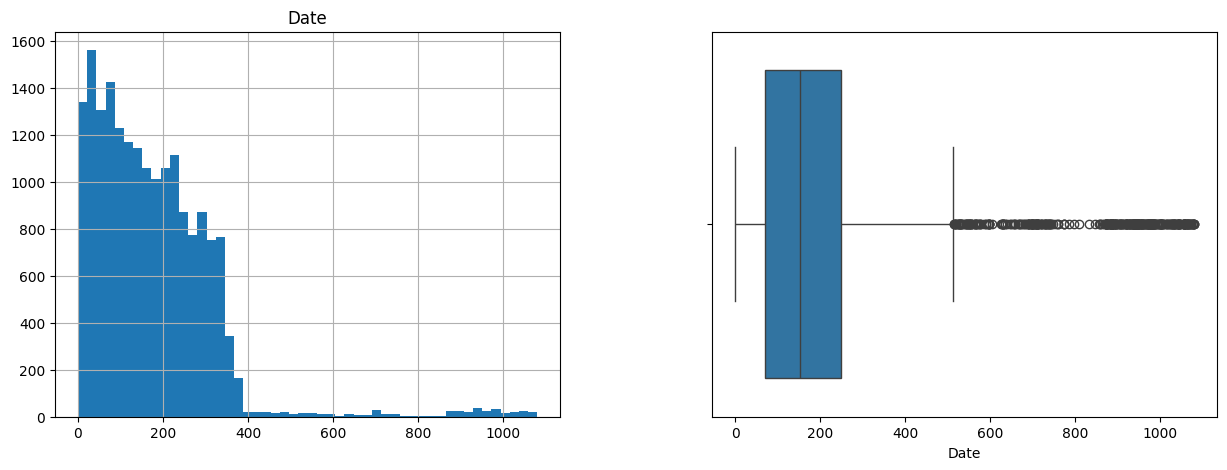

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dfR[["Date"]].hist(bins=50, ax=axes[0])
sns.boxplot(x=dfR['Date'])



In [13]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

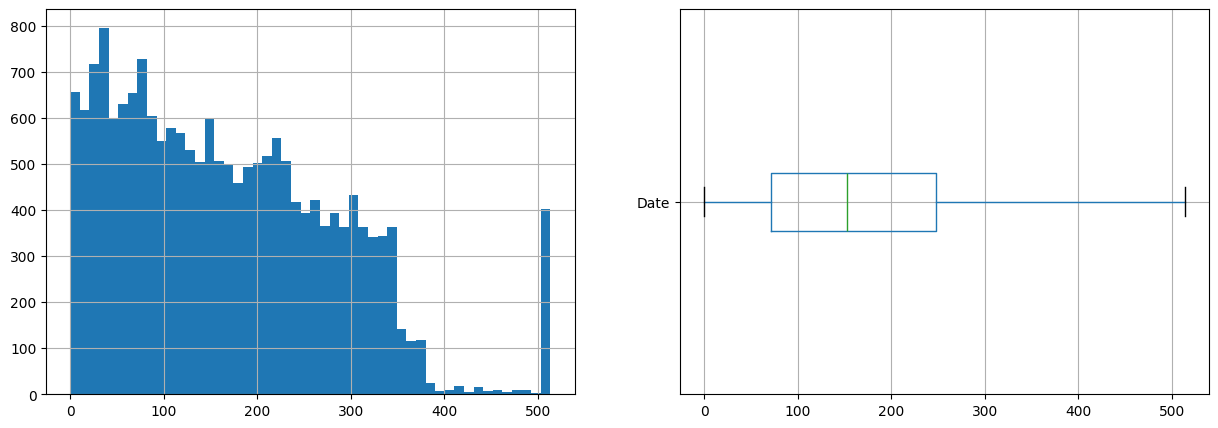

In [14]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(dfR["Date"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\3267442461.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfR['Date'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\3267442461.py:15: UserWarning: 

`distplot` is a deprec

Lambda value used for Transformation: 0.3629484789541874


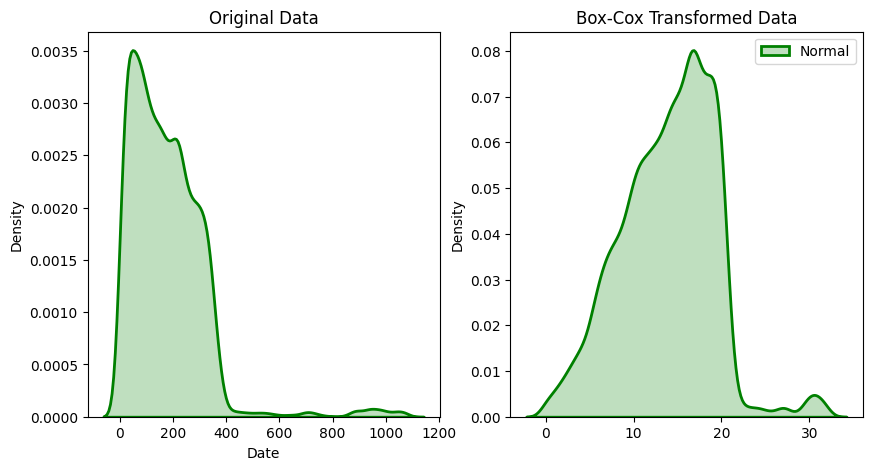

In [15]:
# transform training data & save lambda value
# Add a constant to make all data positive
dfR['Date'] = dfR['Date'] + abs(dfR['Date'].min()) + 1
fitted_dataR, fitted_lambdaR = stats.boxcox(dfR['Date'])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(dfR['Date'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_dataR, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

#add title to each histogram
ax[0].set_title('Original Data')
ax[1].set_title('Box-Cox Transformed Data') 
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambdaR}")
#convert to dataframe
df_fitted_dataR=pd.DataFrame(fitted_dataR)

In [16]:
# Calculate skewness
skewness = skew(dfR['Date'])
# Print the result
print("Skewness:", skewness)
# Calculate skewness
skewnessBC = skew(df_fitted_dataR)
# Print the result
print("Skewness after Box-cox:", skewnessBC)

Skewness: 2.4703942670258736
Skewness after Box-cox: [0.00232972]


C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\2405812207.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfR['Date'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\2405812207.py:13: UserWarning: 

`distplot` is a depreca

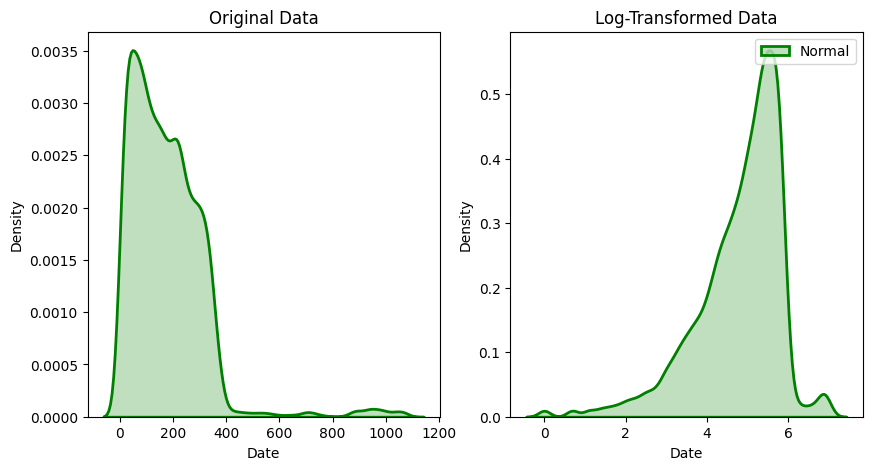

In [17]:
#create log-transformed data
Date_log = np.log(dfR['Date'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(dfR['Date'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = axs[0])
 
sns.distplot(Date_log, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = axs[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 

C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\3574111148.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfR['Date'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\3574111148.py:12: UserWarning: 

`distplot` is a depreca

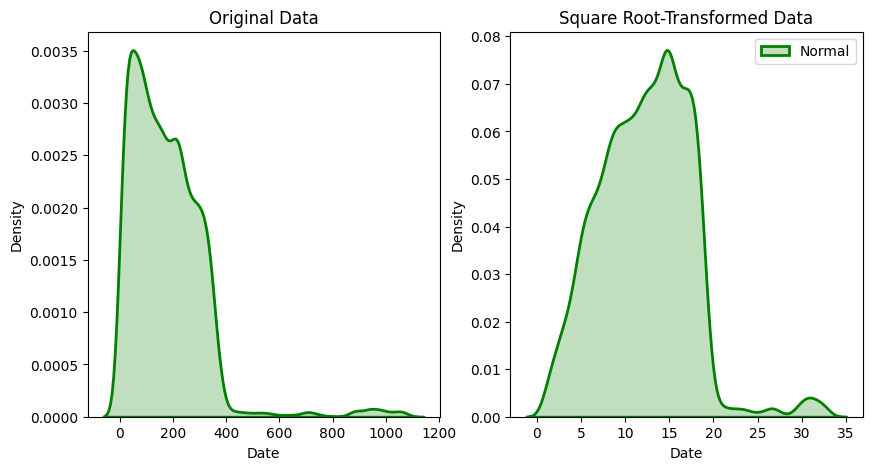

In [18]:
# Create square root-transformed data
Date_sqrt = np.sqrt(dfR['Date'])

# Define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# Plotting the original data(non-normal) and fitted data (normal)
sns.distplot(dfR['Date'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Non-Normal", color ="green", ax = axs[0])
 
sns.distplot(Date_sqrt, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Normal", color ="green", ax = axs[1])
 
# Adding legends to the subplots
plt.legend(loc = "upper right")

# Add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root-Transformed Data')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\67987116.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfR['Date'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\67987116.py:12: UserWarning: 

`distplot` is a deprecated 

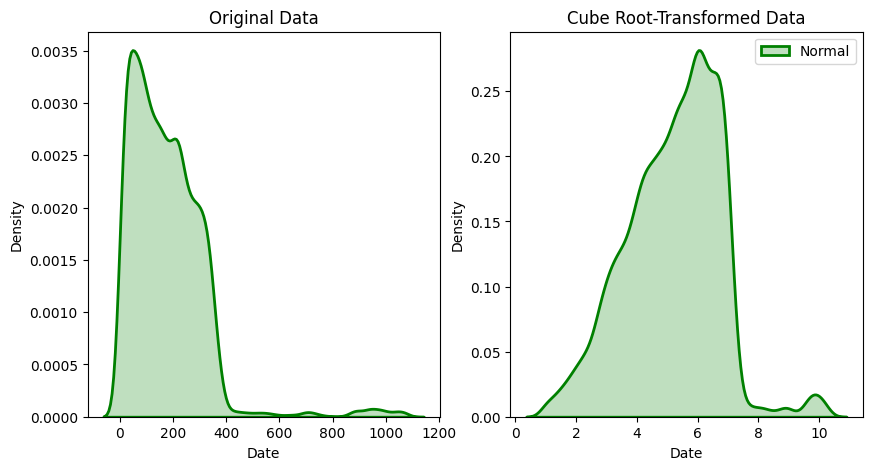

In [19]:
# Create cube root-transformed data
Date_cbrt = np.cbrt(dfR['Date'])

# Define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# Plotting the original data(non-normal) and fitted data (normal)
sns.distplot(dfR['Date'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Non-Normal", color ="green", ax = axs[0])
 
sns.distplot(Date_cbrt, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Normal", color ="green", ax = axs[1])
 
# Adding legends to the subplots
plt.legend(loc = "upper right")

# Add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root-Transformed Data')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

**Calculate Frequency**

Frequency of each CustomerKey is calculated by counting unique value of 'Sales Order'.

In [20]:
Frequency = df.drop_duplicates(subset=['Sales Order']).groupby(['CustomerKey'])[['Sales Order']].count()
Frequency

,Sales Order
CustomerKey,
11000,3
11001,3
11002,3
11003,3
11004,3
...,...
29479,1
29480,1
29481,1


In [21]:
dfF = pd.DataFrame(Frequency)

percentiles = dfF['Sales Order'].quantile([0.25, 0.5, 0.75, 1])
dfF['Sales Order'] = dfF['Sales Order'].astype(int)

dfF['Frequency_Score'] = pd.cut(dfF['Sales Order'], bins=[-float('inf')] + list(percentiles) + [float('inf')], labels=[4, 3, 2, 1], include_lowest=True, duplicates='drop')
dfF

,Sales Order,Frequency_Score
CustomerKey,,
11000,3,2
11001,3,2
11002,3,2
11003,3,2
11004,3,2
...,...,...
29479,1,4
29480,1,4
29481,1,4


In [22]:
Q1 = dfF['Sales Order'].quantile(0.25)
Q3 = dfF['Sales Order'].quantile(0.75)
IQR = Q3 - Q1
outliers = dfF[(dfF['Sales Order'] < (Q1 - 1.5 * IQR)) | (dfF['Sales Order'] > (Q3 + 1.5 * IQR))]
print(outliers)

             Sales Order Frequency_Score
CustomerKey                             
11019                 17               2
11078                 17               2
11091                 28               2
11131                  5               2
11142                 17               2
...                  ...             ...
15761                  4               2
15826                  4               2
16358                  4               2
16497                  4               2
16667                  4               2

[245 rows x 2 columns]


<Axes: xlabel='Sales Order'>

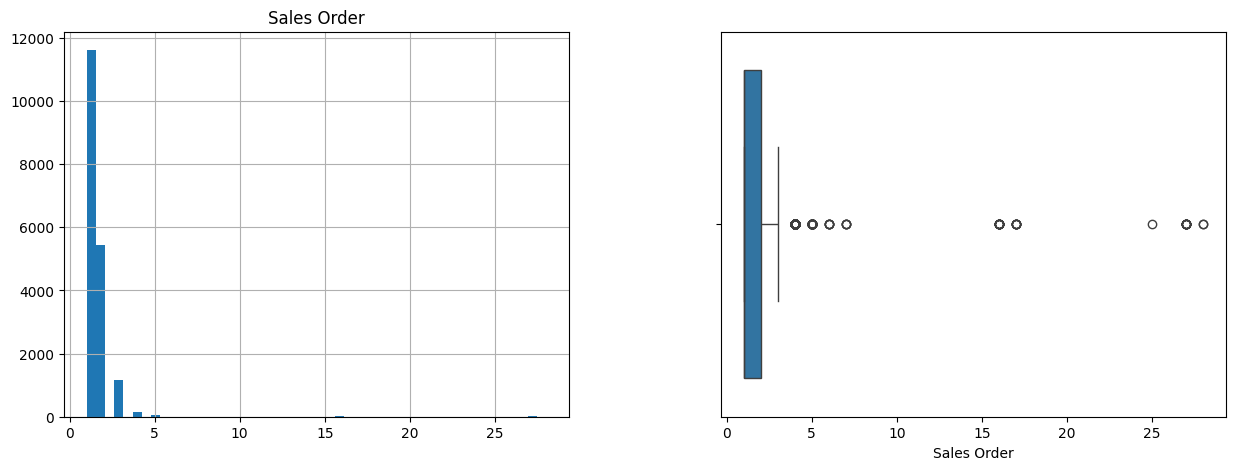

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dfF[["Sales Order"]].hist(bins=50, ax=axes[0])
sns.boxplot(x=dfF['Sales Order'])

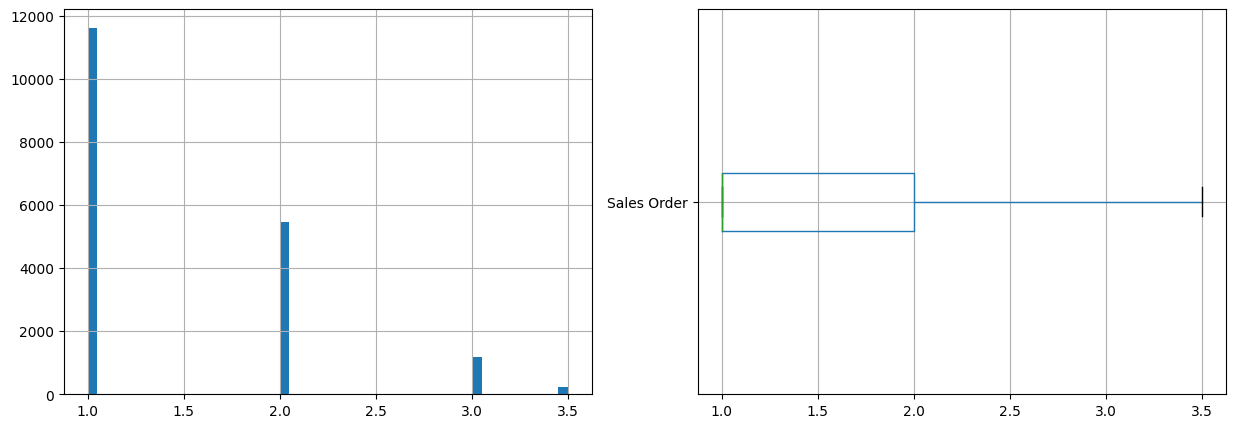

In [24]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(dfF["Sales Order"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\1444143630.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfF['Sales Order'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\1444143630.py:15: UserWarning: 

`distplot` is a

Lambda value used for Transformation: -4.719019467470247


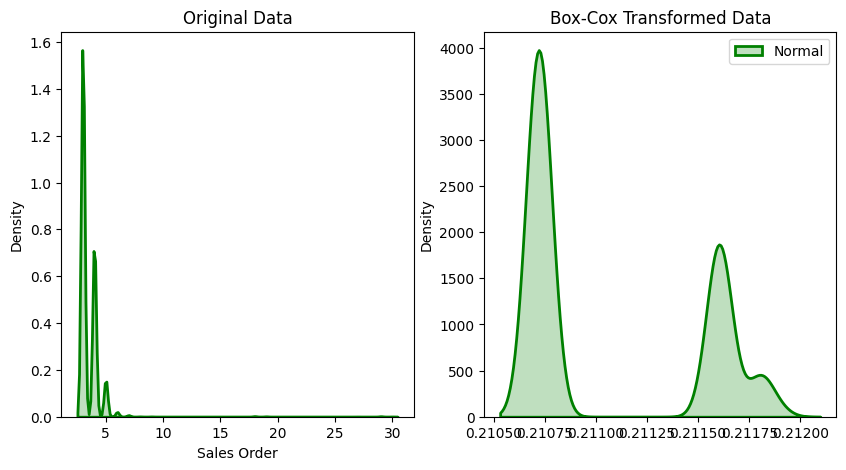

In [25]:
# transform training data & save lambda value
# Add a constant to make all data positive
dfF['Sales Order'] = dfF['Sales Order'] + abs(dfF['Sales Order'].min()) + 1
fitted_dataF, fitted_lambdaF = stats.boxcox(dfF['Sales Order'])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(dfF['Sales Order'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_dataF, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

#add title to each histogram
ax[0].set_title('Original Data')
ax[1].set_title('Box-Cox Transformed Data') 
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambdaF}")
#convert to dataframe
df_fitted_dataF=pd.DataFrame(fitted_dataF)


In [26]:
# Calculate skewness
skewness = skew(dfF['Sales Order'])
# Print the result
print("Skewness:", skewness)
# Calculate skewness
skewnessBC = skew(df_fitted_dataF)
# Print the result
print("Skewness after Box-cox:", skewnessBC)

Skewness: 12.578673101554138
Skewness after Box-cox: [0.5787083]


C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\3812401280.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfF['Sales Order'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\3812401280.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SalesOrder_log, hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


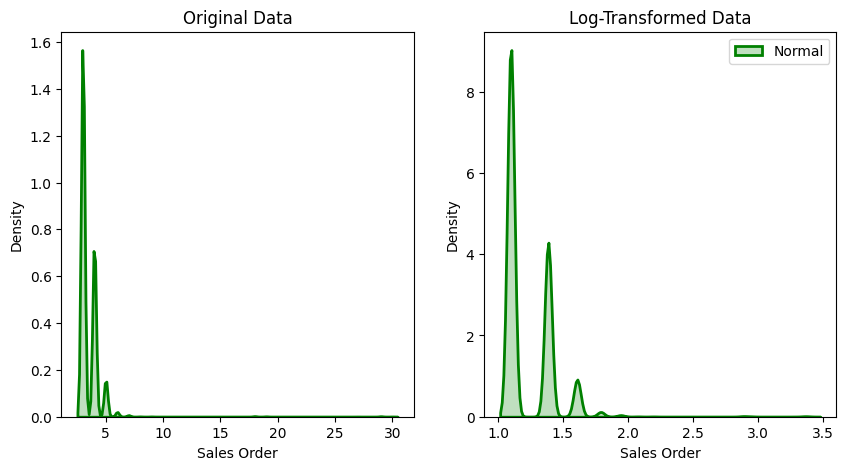

In [27]:
#create log-transformed data
SalesOrder_log = np.log(dfF['Sales Order'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(dfF['Sales Order'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = axs[0])
 
sns.distplot(SalesOrder_log, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = axs[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\3134102773.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfF['Sales Order'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\3134102773.py:12: UserWarning: 

`distplot` is a 

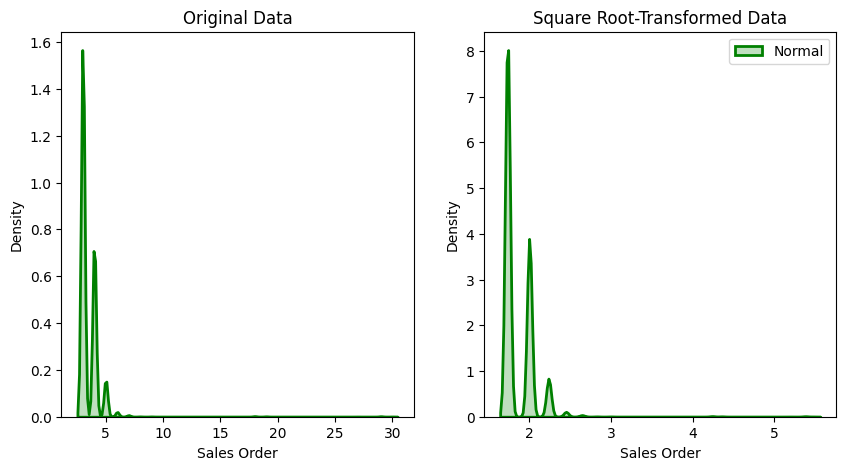

In [28]:
# Create square root-transformed data
SalesOrder_sqrt = np.sqrt(dfF['Sales Order'])

# Define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# Plotting the original data(non-normal) and fitted data (normal)
sns.distplot(dfF['Sales Order'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Non-Normal", color ="green", ax = axs[0])
 
sns.distplot(SalesOrder_sqrt, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Normal", color ="green", ax = axs[1])
 
# Adding legends to the subplots
plt.legend(loc = "upper right")

# Add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root-Transformed Data')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\2127125989.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfF['Sales Order'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\2127125989.py:12: UserWarning: 

`distplot` is a 

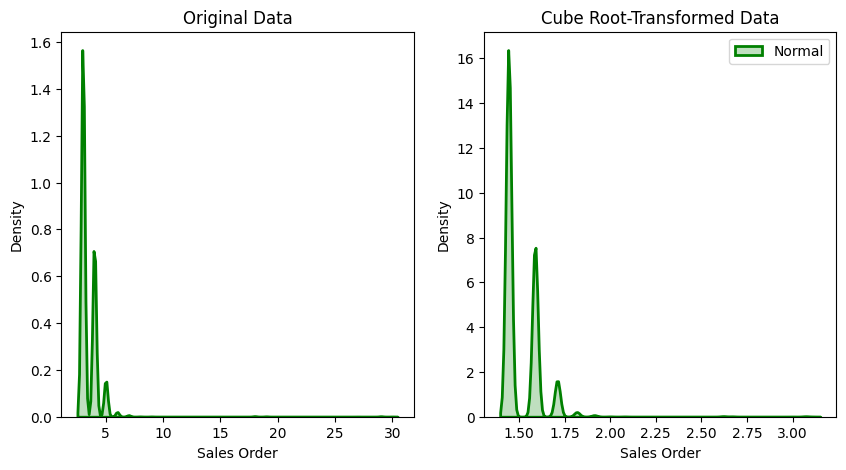

In [29]:
# Create cube root-transformed data
SalesOrder_cbrt = np.cbrt(dfF['Sales Order'])

# Define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# Plotting the original data(non-normal) and fitted data (normal)
sns.distplot(dfF['Sales Order'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Non-Normal", color ="green", ax = axs[0])
 
sns.distplot(SalesOrder_cbrt, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Normal", color ="green", ax = axs[1])
 
# Adding legends to the subplots
plt.legend(loc = "upper right")

# Add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root-Transformed Data')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

**Calculate Monetary**

Monentary of each CustomerKey is calculated by summing 'Sales Amount'.

In [30]:
Monetary = df.groupby(['CustomerKey']).agg({'Sales Amount': lambda x: x.sum()})
Monetary.head(15)

,Sales Amount
CustomerKey,
11000,8248.99
11001,6383.88
11002,8114.04
11003,8139.29
11004,8196.01
11005,8121.33
11006,8119.03
11007,8211.00
11008,8106.31


In [31]:
dfM = pd.DataFrame(Monetary)
dfM['Monetary_Score'] = pd.qcut(dfM['Sales Amount'], q=4, labels=[4, 3, 2, 1])
dfM.head(15)

,Sales Amount,Monetary_Score
CustomerKey,,
11000,8248.99,1
11001,6383.88,1
11002,8114.04,1
11003,8139.29,1
11004,8196.01,1
11005,8121.33,1
11006,8119.03,1
11007,8211.00,1
11008,8106.31,1


In [32]:
Q1 = dfM['Sales Amount'].quantile(0.25)
Q3 = dfM['Sales Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = dfM[(dfM['Sales Amount'] < (Q1 - 1.5 * IQR)) | (dfM['Sales Amount'] > (Q3 + 1.5 * IQR))]
print(outliers)

             Sales Amount Monetary_Score
CustomerKey                             
11000             8248.99              1
11001             6383.88              1
11002             8114.04              1
11003             8139.29              1
11004             8196.01              1
...                   ...            ...
18173             7189.35              1
18177             7043.56              1
19031             7226.38              1
19032             6938.58              1
19614             6217.21              1

[677 rows x 2 columns]


<Axes: xlabel='Sales Amount'>

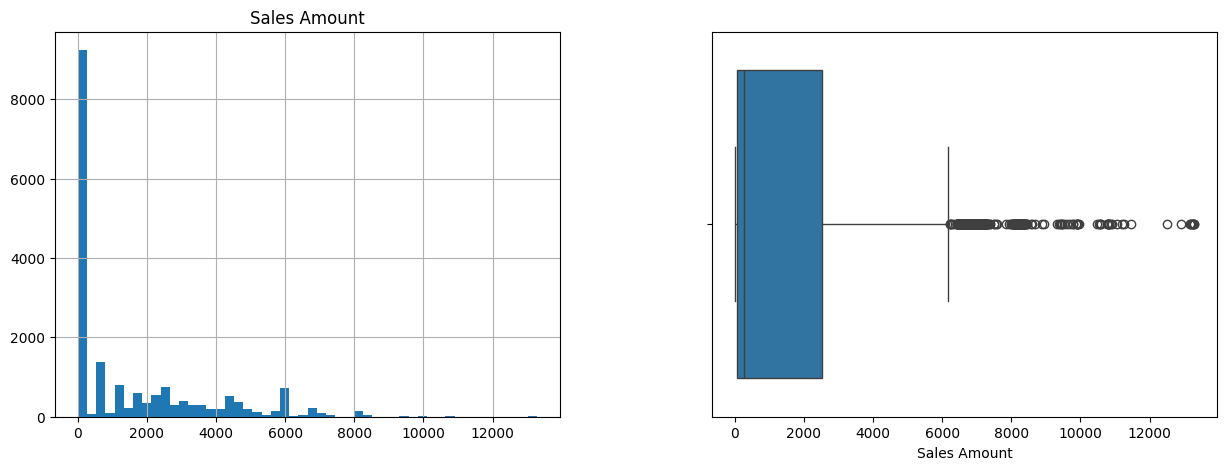

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dfM[["Sales Amount"]].hist(bins=50, ax=axes[0])
sns.boxplot(x=dfM['Sales Amount'])

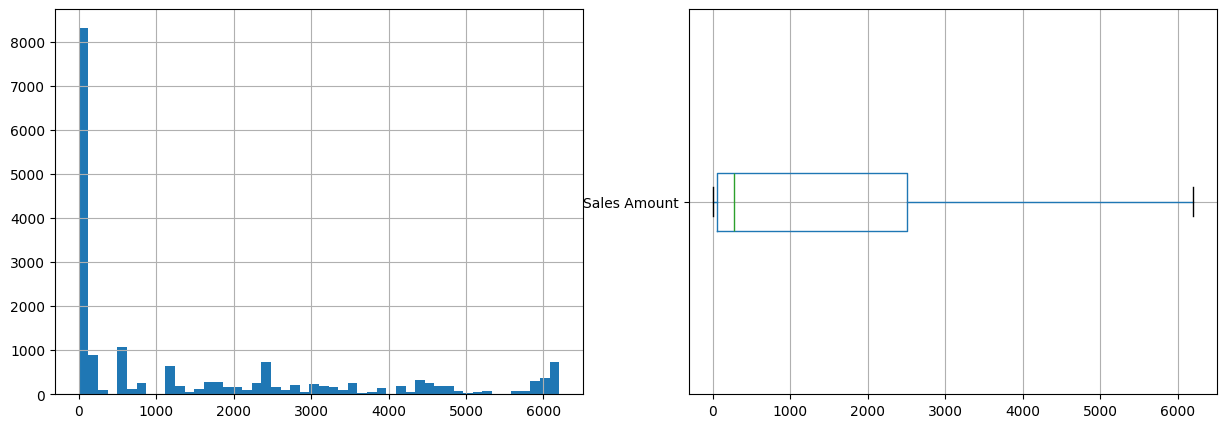

In [34]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(dfM["Sales Amount"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\2249710560.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfM['Sales Amount'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\2249710560.py:16: UserWarning: 

`distplot` is 

Lambda value used for Transformation: 0.016102328227389176


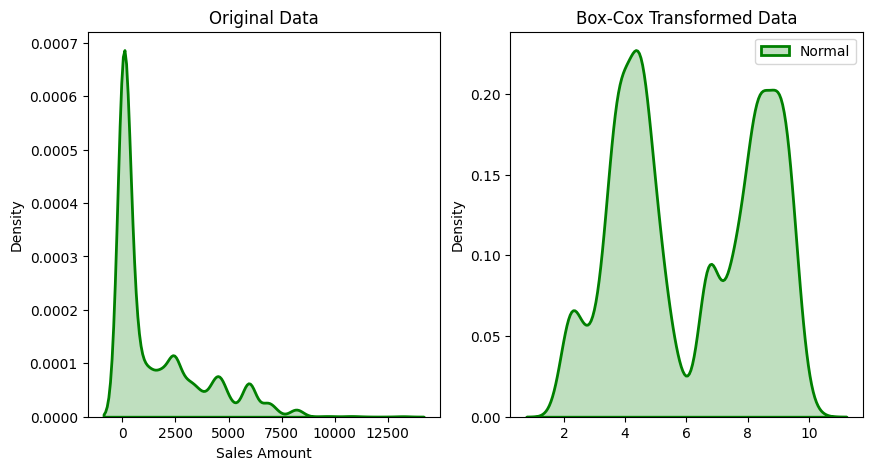

In [35]:
#box-cox transformation
# transform training data & save lambda value
# Add a constant to make all data positive
dfM['Sales Amount'] = dfM['Sales Amount'] + abs(dfM['Sales Amount'].min()) + 1
fitted_dataM, fitted_lambdaM = stats.boxcox(dfM['Sales Amount'])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(dfM['Sales Amount'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_dataM, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

#add title to each histogram
ax[0].set_title('Original Data')
ax[1].set_title('Box-Cox Transformed Data') 
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambdaM}")
#convert to dataframe
df_fitted_dataM=pd.DataFrame(fitted_dataM)

In [36]:
# Calculate skewness
skewness = skew(dfM['Sales Amount'])
print("Skewness:", skewness)

# Calculate skewness
skewnessBC = skew(df_fitted_dataM)
print("Skewness after Box-cox:", skewnessBC)

Skewness: 1.4102137874922136
Skewness after Box-cox: [-0.01646947]


C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\737460486.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfM['Sales Amount'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\737460486.py:13: UserWarning: 

`distplot` is a d

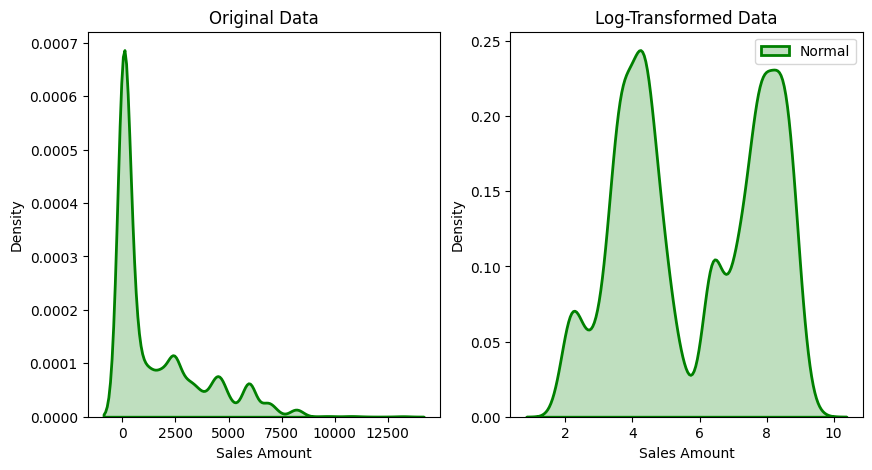

In [37]:
#create log-transformed data
SalesAmount_log = np.log(dfM['Sales Amount'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(dfM['Sales Amount'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = axs[0])
 
sns.distplot(SalesAmount_log, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = axs[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\2595912645.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfM['Sales Amount'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\2595912645.py:12: UserWarning: 

`distplot` is a

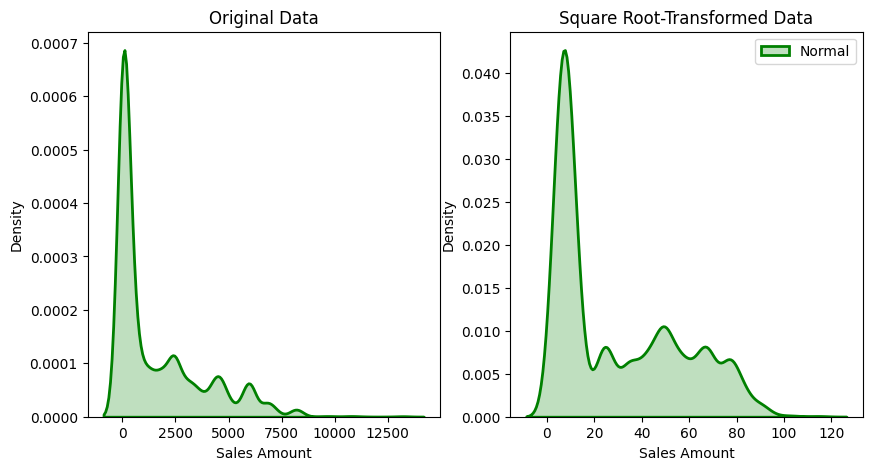

In [38]:
# Create square root-transformed data
SalesAmount_sqrt = np.sqrt(dfM['Sales Amount'])

# Define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# Plotting the original data(non-normal) and fitted data (normal)
sns.distplot(dfM['Sales Amount'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Non-Normal", color ="green", ax = axs[0])
 
sns.distplot(SalesAmount_sqrt, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Normal", color ="green", ax = axs[1])
 
# Adding legends to the subplots
plt.legend(loc = "upper right")

# Add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root-Transformed Data')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\1781781442.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfM['Sales Amount'], hist = False, kde = True,
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_50436\1781781442.py:12: UserWarning: 

`distplot` is a

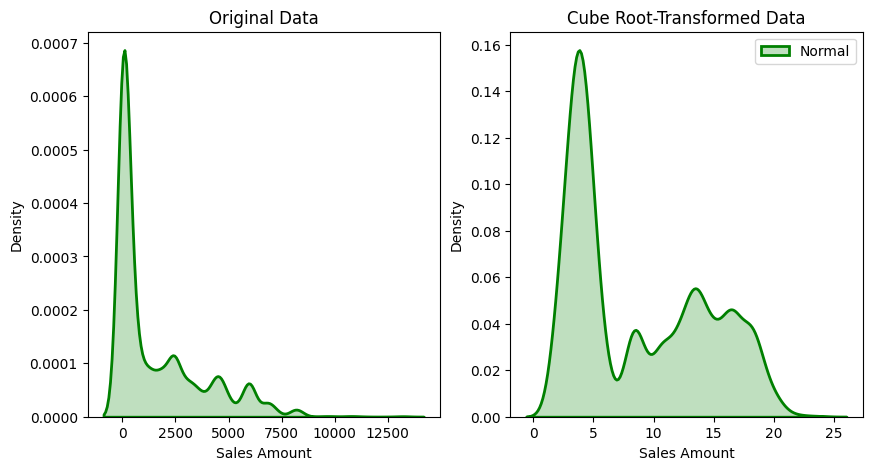

In [39]:
# Create square root-transformed data
SalesAmount_cbrt = np.cbrt(dfM['Sales Amount'])

# Define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# Plotting the original data(non-normal) and fitted data (normal)
sns.distplot(dfM['Sales Amount'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Non-Normal", color ="green", ax = axs[0])
 
sns.distplot(SalesAmount_cbrt, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Normal", color ="green", ax = axs[1])
 
# Adding legends to the subplots
plt.legend(loc = "upper right")

# Add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root-Transformed Data')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

In [40]:
RFM = pd.concat([dfR, dfF, dfM], axis=1)
dfR.columns = ['Recency', 'Recency_Score']
dfF.columns = ['Frequency', 'Frequency_Score']
dfM.columns = ['Monetary', 'Monetary_Score']
RFM['RFM_Score'] = RFM['Recency_Score'].astype(str) + RFM['Frequency_Score'].astype(str) + RFM['Monetary_Score'].astype(str)
RFM

,Date,Recency_Score,Sales Order,Frequency_Score,Sales Amount,Monetary_Score,RFM_Score
CustomerKey,,,,,,,
11000,256,4,5,2,8252.28,1,421
11001,35,1,5,2,6387.17,1,121
11002,325,4,5,2,8117.33,1,421
11003,249,3,5,2,8142.58,1,321
11004,258,4,5,2,8199.30,1,421
...,...,...,...,...,...,...,...
29479,497,4,3,4,2052.39,2,442
29480,181,3,3,4,2445.32,2,342
29481,885,4,3,4,3378.28,1,441


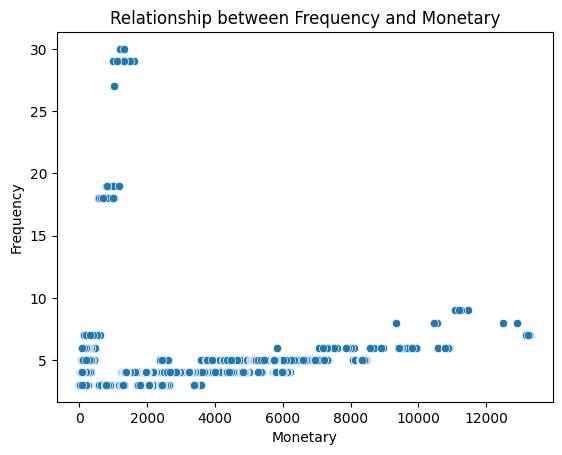

In [41]:
# Create scatter plot 
sns.scatterplot(x='Sales Amount', y='Sales Order', data=RFM.iloc[1:])

# Add labels and title
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Relationship between Frequency and Monetary')

# Show the plot
plt.show()

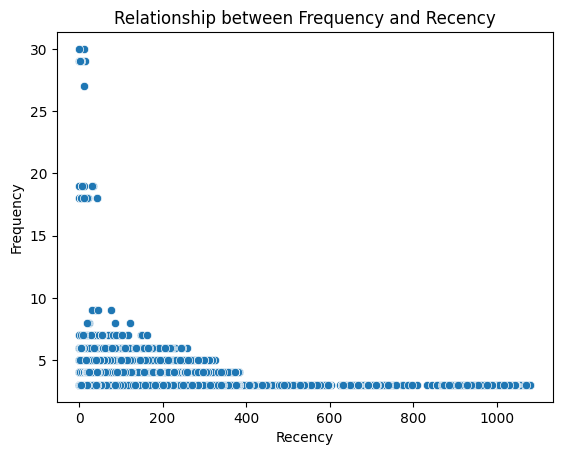

In [42]:
# Create scatter plot 
sns.scatterplot(x='Date', y='Sales Order', data=RFM.iloc[1:])

# Add labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Relationship between Frequency and Recency')

# Show the plot
plt.show()

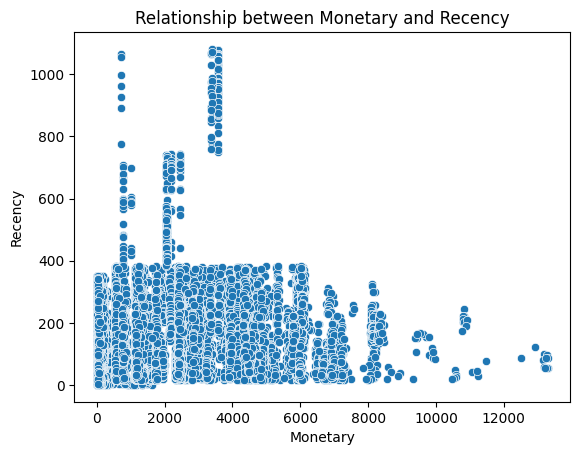

In [43]:
# Create scatter plot
sns.scatterplot(y='Date', x='Sales Amount', data=RFM.iloc[1:])

# Add labels and title
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.title('Relationship between Monetary and Recency')

# Show the plot
plt.show()

In [44]:
#dataframe after Box-cox transformation
# Reset index of dfR to make 'CustomerKey' a column
dfR_reset = dfR.reset_index()

RFMBC = pd.concat([df_fitted_dataR, df_fitted_dataF , df_fitted_dataM], axis=1)
RFMBC.columns = ['Recency', 'Frequency', 'Monetary']
# Merge RFMBC with dfR_reset on 'CustomerKey'
RFMBC = pd.merge(dfR_reset[['CustomerKey']], RFMBC , left_index=True, right_index=True)

RFMBC


,CustomerKey,Recency,Frequency,Monetary
0,11000,17.861626,0.211802,9.705916
1,11001,7.257971,0.211802,9.410287
2,11002,19.727012,0.211802,9.686853
3,11003,17.655207,0.211802,9.690444
4,11004,17.919941,0.211802,9.698469
...,...,...,...,...
18479,29479,23.474497,0.210721,8.114851
18480,29480,15.424041,0.210721,8.313190
18481,29481,29.585055,0.210721,8.680599
18482,29482,23.203883,0.210721,8.114851


In [45]:
print(RFMBC.dtypes)

CustomerKey      int64
Recency        float64
Frequency      float64
Monetary       float64
dtype: object


In [46]:
#RFMz=RFM.drop('CustomerID', axis=1)
# RFMBC['Recency_Score'] = pd.to_numeric(RFM['Recency_Score'], errors='coerce')
# RFM['Frequency_Score'] = pd.to_numeric(RFM['Frequency_Score'], errors='coerce')
# RFM['Monetary_Score'] = pd.to_numeric(RFM['Monetary_Score'], errors='coerce')
# RFM['RFM_Score'] = pd.to_numeric(RFM['RFM_Score'], errors='coerce')
# Remove rows where 'CustomerKey' equals -1
RFMBC = RFMBC[RFMBC['CustomerKey'] != -1]
RFMz=RFMBC.drop('CustomerKey', axis=1)
data_scaled = RFMz.apply(stats.zscore)
print(data_scaled)
data_scaled.describe().astype('int64')

        Recency  Frequency  Monetary
0      0.756776   1.637109  1.536802
1     -1.247763   1.637109  1.409014
2      1.109412   1.637109  1.528562
3      0.717754   1.637109  1.530114
4      0.767800   1.637109  1.533583
...         ...        ...       ...
18479  1.817845  -0.763367  0.849053
18480  0.295969  -0.763367  0.934787
18481  2.972999  -0.763367  1.093602
18482  1.766688  -0.763367  0.849053
18483  1.799682  -0.763367  0.849053

[18484 rows x 3 columns]


,Recency,Frequency,Monetary
count,18484,18484,18484
mean,0,0,0
std,1,1,1
min,-2,0,-1
25%,0,0,0
50%,0,0,0
75%,0,1,0
max,3,1,1


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

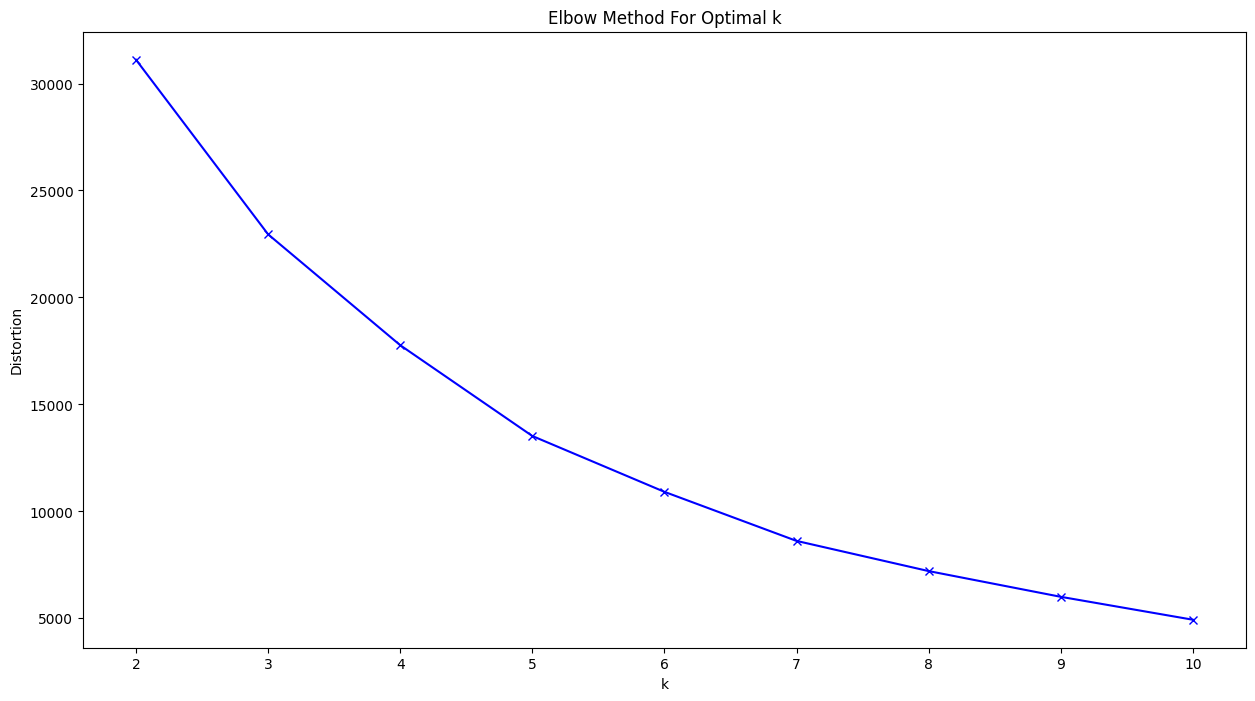

In [47]:
from sklearn.cluster import KMeans
# Create a list to store the sum of squared distances
ssd = []

# Define the range of potential clusters to test
range_n_clusters = list(range(2,11))

# Use the KMeans algorithm to calculate SSD for different numbers of clusters
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_scaled)
    
    ssd.append(kmeans.inertia_)
    
# Add labels and title
plt.figure(figsize=(15,8))
# Plot SSDs for each n_clusters
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')

# Show the plot
plt.show()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

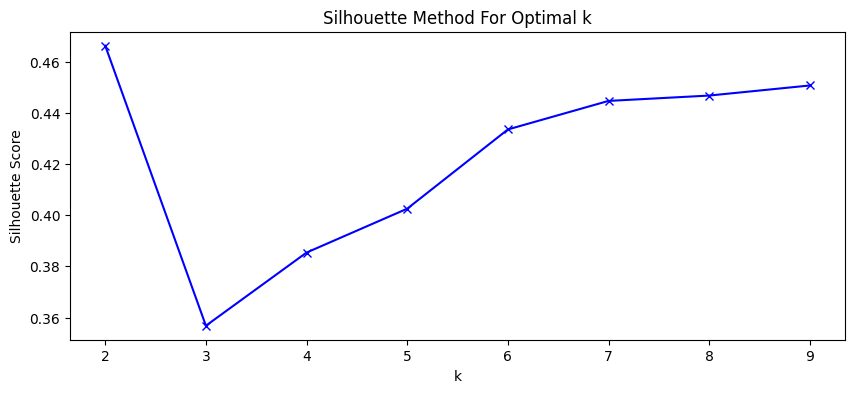

Best number of clusters: 2


In [48]:
from sklearn.metrics import silhouette_score

# Create a list to store the silhouette scores
silhouette_scores = []

# Define the range of potential clusters to test
range_n_clusters = list(range(2,10))

# Use the KMeans algorithm to calculate silhouette scores for different numbers of clusters
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFMz)
    
    cluster_labels = kmeans.labels_
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(RFMz, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot silhouette scores for each n_clusters
plt.figure(figsize=(10,4))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')

# Show the plot
plt.show()
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Best number of clusters: {best_n_clusters}")

In [49]:
# model= KMeans(n_clusters = 4, max_iter = 300)
# model.fit(data_scaled)

In [50]:
# #assign the label
# RFMBC['Cluster_ID'] = model.labels_
# RFMBC